In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
import time
import configparser
import requests
import os
import json
import urllib

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# import hypertools as hyp
%matplotlib inline  

In [117]:
def get_api_call_for_section(query):
    config = configparser.ConfigParser()
    config.read('config/config.cfg')
    BASE_URL = config.get('GUARDIAN', 'BASE_URL')
    API_KEY = config.get('GUARDIAN', 'API_KEY')

    # url_string = BASE_URL + 'search/v2/articlesearch.json?&fq=section_name:"' + section + '"&sort=newest&api-key=' + API_KEY
    url_string = BASE_URL + 'search?q=' + query + '&page-size=200&show-fields=headline,body,shorturl&api-key=' + API_KEY
    return url_string

In [118]:
print('main code')
url_string = get_api_call_for_section('Einstein')
print('make call to ', url_string)
    
req = requests.get(url_string)
data = req.json()
with open('data.txt', 'w') as outfile:
    json.dump(data, outfile, indent=2, sort_keys=True)

main code
make call to  https://content.guardianapis.com/search?q=Einstein&page-size=200&show-fields=headline,body,shorturl&api-key=142a2a21-def2-4ec4-8185-26eea0c9aaaa


In [119]:
with open('data.txt', 'r') as f:
     data = json.load(f)
    

In [120]:
search_results = data['response']['results']

In [121]:
search_results_df = pd.DataFrame(search_results)
search_results_df.info()
search_results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
apiUrl                200 non-null object
fields                200 non-null object
id                    200 non-null object
isHosted              200 non-null bool
pillarId              198 non-null object
pillarName            198 non-null object
sectionId             200 non-null object
sectionName           200 non-null object
type                  200 non-null object
webPublicationDate    200 non-null object
webTitle              200 non-null object
webUrl                200 non-null object
dtypes: bool(1), object(11)
memory usage: 17.5+ KB


,apiUrl,fields,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl
0,https://content.guardianapis.com/environment/2...,{'body': '<p>Australia’s scientific community ...,environment/2018/jan/18/stuart-wenham-scientis...,False,pillar/news,News,environment,Environment,article,2018-01-18T06:12:29Z,Stuart Wenham: scientists pay tribute to 'Eins...,https://www.theguardian.com/environment/2018/j...
1,https://content.guardianapis.com/artanddesign/...,"{'body': '<p>In 1948, I was living in New York...",artanddesign/2018/jan/03/marilyn-stafford-best...,False,pillar/arts,Arts,artanddesign,Art and design,article,2018-01-03T17:07:45Z,Marilyn Stafford's best photograph: Albert Ein...,https://www.theguardian.com/artanddesign/2018/...
2,https://content.guardianapis.com/science/2017/...,{'body': '<p>Wild haired with a bushy moustach...,science/2017/jul/25/playful-einstein-photograp...,False,pillar/news,News,science,Science,article,2017-07-25T17:40:46Z,Playful Einstein photograph goes up for auction,https://www.theguardian.com/science/2017/jul/2...
3,https://content.guardianapis.com/science/2017/...,{'body': '<p>One of the two FA Cup finals Old ...,science/2017/may/31/einstein-looked-up-the-spe...,False,pillar/news,News,science,Science,article,2017-05-31T18:06:14Z,Einstein looked up the speed of light | Brief ...,https://www.theguardian.com/science/2017/may/3...
4,https://content.guardianapis.com/small-busines...,{'body': '<p>One of the advertising world’s mo...,small-business-network/2017/jun/14/sir-john-he...,False,pillar/news,News,small-business-network,Guardian Small Business Network,article,2017-06-14T06:00:19Z,Sir John Hegarty: Einstein didn't have a brain...,https://www.theguardian.com/small-business-net...


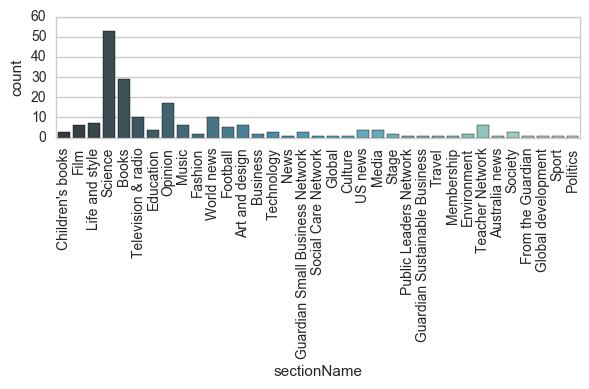

In [144]:
g = sns.countplot(search_results_df['sectionName'], palette='GnBu_d')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('plots/plot1.png')

In [154]:
# format = lambda x: str(x).split('T')[0]
def format(x):
    split = str(x).split('-')
    return split[0] + '-' + split[1]
search_results_df['date'] = search_results_df['webPublicationDate'].map(format)
search_results_df.head()

search_results_df = search_results_df.sort_values('date', ascending=True)



# sns.countplot(search_results_df['date'], palette='GnBu_d')
# plt.xticks(rotation=90)


# plt.savefig('plots/plot2.png')

In [151]:
dates = search_results_df['date'].unique()

origin = dates[0].split("-")
origin
date_count = []
for date in dates:
    date_df = search_results_df[search_results_df['date'] == date]
    split_date = date.split("-")
    
    count = len(date_df)
    months = (int(split_date[0]) - int(origin[0]))*12 + int(split_date[1]) - int(origin[1])
    date_count.append({'date': date, 'count': count, 'months': months})
    
date_count = pd.DataFrame(date_count)
date_count.head()


,count,date,months
0,1,2014-12,0
1,1,2015-01,1
2,1,2015-04,4
3,2,2015-06,6
4,1,2015-09,9


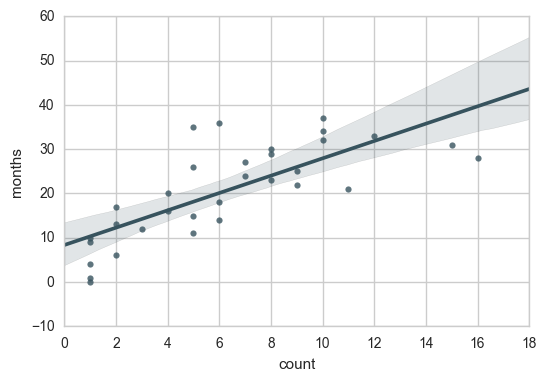

In [153]:
sns.regplot('count', 'months', date_count)
plt.savefig('plots/plot2.png')

## arXiv APi

In [95]:
import xml.etree.ElementTree as ET

arxivUrl = 'http://export.arxiv.org/api/query?search_query=all:Einstein'

data = urllib.request.urlopen(arxivUrl).read()
with open('arxiv.xml', 'wb') as outfile:
    outfile.write(data)

## Wikipedia

In [101]:
articles = pd.read_csv('/Volumes/Porsche/data/articles.csv')

In [102]:
articles.head()

,id,title,redirect
0,10,AccessibleComputing,Computer accessibility
1,13,AfghanistanHistory,History of Afghanistan
2,14,AfghanistanGeography,Geography of Afghanistan
3,15,AfghanistanPeople,Demographics of Afghanistan
4,18,AfghanistanCommunications,Communications in Afghanistan
